ESTO ES LO QUE UTILIZO DEL DATASET PRINCIPAL

IMPORTACIÓN DE BIBLIOTECAS 
PRIMERA PARTE DEL ELT 

In [71]:
# Importo biblioteca
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


ELT:


1. **Extracción (Extract)**: En esta fase, los datos se recopilan desde múltiples fuentes, que pueden ser bases de datos, archivos, servicios web, sistemas de terceros, etc. La extracción implica identificar y acceder a las fuentes de datos, luego extraer la información de estas fuentes.

2. **Transformación (Transform)**: Después de extraer los datos, se lleva a cabo la fase de transformación. En esta etapa, los datos se limpian, se reorganizan y se modifican para que cumplan con los requisitos de calidad y estructura necesarios. Esto puede incluir la eliminación de datos duplicados, la conversión de formatos, la agregación de datos, la detección y manejo de valores atípicos, la normalización de datos, entre otras operaciones.

3. **Carga (Load)**: Una vez que los datos han sido extraídos y transformados, se cargan en el sistema de destino, como una base de datos o un almacén de datos. La carga se realiza de manera que los datos estén disponibles y sean accesibles para consultas y análisis.


In [72]:

ruta_archivo = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Projecto2\DATASET\internet_penetracion_100_hog.csv'
Internet_Hogares = pd.read_csv(ruta_archivo, sep=',',usecols=['año', 'trimestre', 'provincia', 'accesos_por_cada_100_hogares'])

# Imprimir las primeras 95 filas
Internet_Hogares = Internet_Hogares.head(95)

# Uso las del año 2022
Internet_Hogares



,año,trimestre,provincia,accesos_por_cada_100_hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57
...,...,...,...,...
90,2022,1,San Luis,80.72
91,2022,1,Santa Cruz,43.34
92,2022,1,Santa Fe,77.30
93,2022,1,Santiago Del Estero,47.17


In [73]:
# Ruta del archivo CSV
ruta_archivoT = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Projecto2\DATASET\Internet_Accesos-por-velocidad_Total.csv'

# Leer el archivo CSV
datos_Total = pd.read_csv(ruta_archivoT)

# Obtener las primeras 4 filas del DataFrame
Data_total2022 = datos_Total

# Seleccionar solo las columnas deseadas
columnas_deseadas = ['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS', 'Total']

# Crear un nuevo DataFrame con las columnas deseadas
datos_seleccionados = datos_Total[columnas_deseadas]

# Asignar el nuevo DataFrame a la variable Data_total2022
Data_total2022 = datos_seleccionados

Data_total2022

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,"31,981","85,668","1,075,272","1,109,421","765,015","335,573","7,410,902","394,282","11,208,114"
1,2022,3,"33,013","96,727","1,161,370","1,151,906","823,505","479,822","6,995,750","349,035","11,091,128"
2,2022,2,"33,667","99,498","1,193,090","1,197,030","856,562","485,321","6,741,922","351,594","10,958,684"
3,2022,1,"34,890","104,840","1,263,273","1,209,148","967,508","509,830","6,336,187","198,333","10,624,009"


In [74]:
# Ruta del archivo CSV
ruta_archivo6 = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Projecto2\DATASET\Velocidad media de bajada de internet fijo por provincia.csv'

# Leer el archivo CSV
datos6 = pd.read_csv(ruta_archivo6)

# Me quedo con las filas de Año
datos6_2022 = datos6[datos6['Año'] == 2022]

#Elimino Trimestre 
datos6_2022 = datos6_2022.drop('Trimestre', axis=1)

# Renombro el data frame
vel_fijo_prov = datos6_2022

# Veo solo las primeras filas junto al encabezado
vel_fijo_prov.head()

,Año,Provincia,Mbps (Media de bajada)
0,2022,Buenos Aires,111.000
1,2022,Capital Federal,18.286
2,2022,Catamarca,8.333
3,2022,Chaco,10.402
4,2022,Chubut,1.592


In [75]:
# Ruta del archivo CSV
ruta_archivo13 = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Projecto2\DATASET\Acceso a Internet fijo por tecnología y localidad.csv'

# Leer el archivo CSV
datos13 = pd.read_csv(ruta_archivo13)

# Reemplazo "- 0" por "0" en todas las columnas
datos13.replace('- 0', '0', inplace=True)

# Reemplazo NaN por 0 
datos13.fillna(0, inplace=True)

# Eliminar la columna 'Partido'
datos13 = datos13.drop('Partido', axis=1)

# Eliminar filas con celdas vacías en la columna 'Localidad'
datos13 = datos13.dropna(subset=['Localidad'])

# Renombro
acc_fijo_tec_loc = datos13

# Me muestra solo las primeras filas
acc_fijo_tec_loc

,Provincia,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,6854100,874,"4,54",0,3,0,852,0,706,"6,98",0.0
1,BUENOS AIRES,Del Valle,6854020,181,0,0,0,10,1,0,0,192,0.0
2,BUENOS AIRES,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181,0.0
3,BUENOS AIRES,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,"1,28",0.0
4,BUENOS AIRES,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,TUCUMAN,Villa Mariano Moreno - El Colmenar,90105100,0,31,0,"3,73",0,0,0,0,"3,76",0.0
3133,TUCUMAN,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,313,313,0.0
3134,TUCUMAN,Villa de Trancas,90112030,126,0,0,0,33,0,0,101,260,0.0
3135,TUCUMAN,Villa Carmela,90119020,"1,5",0,0,0,1,0,0,97,"1,6",0.0


In [76]:

# Ruta del archivo CSV
ruta_archivo8 = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Projecto2\DATASET\Acceso a Internet Fijo por rangos de velcoidad de bajada y provincia.csv'

datos8 = pd.read_csv(ruta_archivo8)

# Me quedo con las filas de Año
datos8_2022 = datos8[datos8['Año'] == 2022]

#Elimino Trimestre 
datos8_2022 = datos8_2022.drop('Trimestre', axis=1)

# Me quedo con las columnas que me son útiles
columnas_deseadas = ['Año', 'Provincia', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

datos8 = datos8_2022[columnas_deseadas]

# Eliminar filas duplicadas basadas en la columna 'Provincia'
datos8 = datos8.drop_duplicates(subset='Provincia', keep='first')

# Eliminar filas con celdas vacías en la columna 'Provincia'
datos8 = datos8.dropna(subset=['Provincia'])

# Renombro y veo las primeas filas 
acc_fijo_vel_prov = datos8
acc_fijo_vel_prov.head()


,Año,Provincia,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS
0,2022,Buenos Aires,98.670,3.760.109,97.634
1,2022,Capital Federal,8.116,1.299.117,106.772
2,2022,Catamarca,3.122,52.739,2.280
3,2022,Chaco,3.039,94.866,3.909
4,2022,Chubut,15.770,19.048,20.026


In [77]:

# Ruta del archivo CSV
ruta_archivo11 = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Projecto2\DATASET\Accesos a Internet fijo por velcoidad de bajada y localidad.csv'

# Leer el archivo CSV
datos11 = pd.read_csv(ruta_archivo11)

# Convierto en Data Frame solo las que me interesan para el trabajo
columnas_11 = ['Provincia', 'Partido', 'Localidad', 'Link Indec', '20 Mbps','30 Mbps','50 Mbps','80 Mbps']

datos11 = datos11[columnas_11]

# Eliminar filas duplicadas basadas en la columna 'Localidad'
datos11 = datos11.drop_duplicates(subset='Localidad', keep='first')

# Eliminar filas con celdas vacías en la columna 'Localidad'
datos11 = datos11.dropna(subset=['Localidad'])

# Eliminar la columna 'Partido'
datos11 = datos11.drop('Partido', axis=1)


# Renombro y veo las primeras filas 
acc_fijo_vel_baj_loc = datos11
acc_fijo_vel_baj_loc.head()

,Provincia,Localidad,Link Indec,20 Mbps,30 Mbps,50 Mbps,80 Mbps
0,BUENOS AIRES,25 de Mayo,6854100,595.0,96.0,NaN,12.0
1,BUENOS AIRES,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN
2,BUENOS AIRES,Del Valle,6854020,NaN,NaN,NaN,NaN
3,BUENOS AIRES,Ernestina,6854030,NaN,NaN,NaN,NaN
4,BUENOS AIRES,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN


In [78]:
# Ruta del archivo CSV
ruta_archivo14 = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Projecto2\DATASET\Listado de localidades con conectividad a internet.csv'

# Leer el archivo CSV
datos14 = pd.read_csv(ruta_archivo14)


# Eliminar filas duplicadas basadas en la columna 'Localidad'
datos14 = datos14.drop_duplicates(subset='Localidad', keep='first')

# Eliminar filas con celdas vacías en la columna 'Localidad'
datos14 = datos14.dropna(subset=['Localidad']) 

# Eliminar la columna 'Partido'
datos14 = datos14.drop('Partido', axis=1)

# Renombro y veo solo las primeras filas 
lis_loc_con_int =  datos14
lis_loc_con_int.head()

,Provincia,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--


SEGUNDO DATASET (ALTERNATIVO/SECUNDARIO)

In [79]:
# Ruta del archivo CSV
ruta_archivoa = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Projecto2\DATASET2\Porcentaje de reclamos por operador de Internet fijo (año en curso).csv'

# Leer el archivo CSV
datosa = pd.read_csv(ruta_archivoa)

# Renombro y veo solo las primeras filas
por_fijo = datosa
por_fijo

,Operador,Cantidad
0,Telecom Argentina S.A.,2.528
1,Telefonica de Argentina S.A.,687.000
2,TELECENTRO S.A.,747.000
3,Otros,673.000


In [80]:
# Ruta del archivo CSV
ruta_archivob = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Projecto2\DATASET2\Porcentaje de reclamos por operador de telefonía móvil (año en curso).csv'

# Leer el archivo CSV
datosb = pd.read_csv(ruta_archivob)

# Renombro y veo el Data Frame 
por_movil = datosb
por_movil

,Operador,Cantidad
0,Telecom Argentina S.A.,1.018
1,Movistar - Telefonica Moviles Argentina S.A.,860.000
2,AMX Argentina S.A. (Claro),388.000
3,Otros,38.000


In [81]:
# Ruta del archivo CSV
ruta_archivoc = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Projecto2\DATASET2\Reclamos mensuales por tipo de servicio.csv'

# Leer el archivo CSV
datosc = pd.read_csv(ruta_archivoc)

# Renombro y veo el Data Frame 
rec_ser = datosc
rec_ser 

,Año,Mes,Telefonía Fija,Internet Fijo,Comunicaciones Moviles,TV por cable,Total mensual
0,2023,1,1.161,694,257,144,2.256
1,2023,2,1.032,658,257,145,2.092
2,2023,3,1.262,819,366,171,2.618
3,2023,4,849.000,469,257,107,1.682
4,2023,5,775.000,472,253,98,1.598
5,2023,6,712.000,477,223,64,1.476
6,2023,7,648.000,421,245,92,1.406
7,2023,8,647.000,395,263,88,1.393
8,2023,9,668.000,469,214,84,1.435


In [82]:
# Ruta del archivo CSV
ruta_archivod = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Projecto2\DATASET2\Reclamos mensuales recibidos por motivo de reclamo.csv'

# Leer el archivo CSV
datosd = pd.read_csv(ruta_archivod)

# Renombro y veo el Data Frame
rec_mot = datosd 
rec_mot 

,Año,Mes,Problemas técnicos,Facturación,Gestiones administrativas,Otros,Total mensual
0,2023,1,1240,504,407,105,2256
1,2023,2,1140,468,393,91,2092
2,2023,3,1384,633,433,168,2618
3,2023,4,842,440,294,106,1682
4,2023,5,777,434,293,94,1598
5,2023,6,665,399,320,92,1476
6,2023,7,648,379,291,88,1406
7,2023,8,656,368,288,81,1393
8,2023,9,743,341,260,91,1435


In [83]:
# Ruta del archivo CSV
ruta_archivoe = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Projecto2\DATASET2\Reclamos por operador y motivo de reclamo.csv'

# Leer el archivo CSV
datose = pd.read_csv(ruta_archivoe)

# Renombro y veo el Data Frame
rec_rec = datose
rec_rec 

,Año,Mes,Motivo de Reclamo,Operador,Cantidad
0,2023,1,Facturación,AMX Argentina S.A. (Claro),16
1,2023,1,Facturación,DIRECTV Argentina S.A.L,4
2,2023,1,Facturación,Fibertel S.A. (TCI),8
3,2023,1,Facturación,Movistar - Telefonica Moviles Argentina S.A.,24
4,2023,1,Facturación,Otros,25
...,...,...,...,...,...
311,2023,9,Problemas Técnicos,Movistar - Telefonica Moviles Argentina S.A.,17
312,2023,9,Problemas Técnicos,Otros,58
313,2023,9,Problemas Técnicos,TELECENTRO S.A.,28
314,2023,9,Problemas Técnicos,Telecom Argentina S.A.,450


EDA:

1. **Resumen inicial**:
   - Visualiza las primeras filas de la tabla con para obtener una vista previa de los datos.

2. **Estadísticas descriptivas**:
   - Calcula estadísticas descriptivas básicas, como la media, mediana, desviación estándar, máximo y mínimo, para comprender la distribución de los valores en la columna "Mbps (Media de bajada)".

3. **Gráficos de distribución**:
   - Crea histogramas o gráficos de densidad para visualizar la distribución de los valores en la columna "Mbps (Media de bajada)". Esto permitirá identificar si la distribución es simétrica, sesgada a la derecha o sesgada a la izquierda.

4. **Visualización por categoría**:
   - Si es posible, puedes agrupar los valores por categorías de "Provincia" y crear gráficos que muestren cómo varía la media de bajada en diferentes provincias.

5. **Relaciones**:
   - Por la discrepancia de las tablas no se pueden crear relaciones. 

6. **Outliers**:
   - Identifica y maneja posibles valores atípicos (outliers) en los datos. Esto puede afectar la media y otros estadísticos.

7. **Correlaciones**:
   - Calcula la matriz de correlación para entender si existe una correlación entre diferentes variables en la tabla.

8. **Visualizaciones adicionales**:
   - Crea gráficos adicionales según las preguntas específicas que desees responder. Por ejemplo, gráficos de caja (box plots) o gráficos de dispersión.

9. **Interpretación**:
   - Comprende los resultados de tu análisis y extrae conclusiones sobre lo que los datos te dicen.

10. **Presentación de hallazgos**:
    - Si es necesario, presenta tus hallazgos en informes, gráficos y visualizaciones para comunicar los resultados de manera efectiva.



PRIMER DATASET RESUMEN ESTADISTICO Y DISTRIBUCIÓN 

Estamos en el año 2022, con 4 trimestres, accesos por cada 100 hogares por provincias y la Ciudad Autónoma de Buenos Aires.
Los datos que se desprenden son: Cantidad, media, desviación estandar, minimo, primer, segundo y tercer cuartil, la mediana coincide con el segundo cuartil
y el valor máximo. 

In [84]:
Internet_Hogares.describe()

,año,trimestre,accesos_por_cada_100_hogares
count,95.0,95.000000,95.000000
mean,2022.0,2.515789,67.933368
std,0.0,1.119110,20.425077
min,2022.0,1.000000,34.960000
25%,2022.0,2.000000,50.130000
50%,2022.0,3.000000,63.900000
75%,2022.0,3.500000,80.690000
max,2022.0,4.000000,122.730000


In [85]:
Data_total2022.describe()

,Año,Trimestre
count,4.0,4.000000
mean,2022.0,2.500000
std,0.0,1.290994
min,2022.0,1.000000
25%,2022.0,1.750000
50%,2022.0,2.500000
75%,2022.0,3.250000
max,2022.0,4.000000


In [86]:
vel_fijo_prov.describe()

,Año,Mbps (Media de bajada)
count,96.0,96.000000
mean,2022.0,27.700729
std,0.0,118.948164
min,2022.0,1.073000
25%,2022.0,2.054500
50%,2022.0,4.162000
75%,2022.0,5.766750
max,2022.0,903.000000


In [87]:
acc_fijo_tec_loc.describe()

,Unnamed: 13
count,3137.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [88]:
acc_fijo_vel_prov.describe()

,Año,+ 20 Mbps - 30 Mbps,OTROS
count,24.0,24.000000,24.000000
mean,2022.0,73.214583,86.649792
std,0.0,154.420041,238.590649
min,2022.0,1.375000,0.000000
25%,2022.0,3.730500,2.276000
50%,2022.0,8.152000,10.215000
75%,2022.0,36.800750,20.305500
max,2022.0,661.000000,989.000000


In [89]:
acc_fijo_vel_baj_loc.describe()

,20 Mbps,30 Mbps,50 Mbps,80 Mbps
count,1022.000000,657.000000,645.000000,30.000000
mean,77.219569,61.225469,124.887332,111.863067
std,160.537568,150.744114,212.817285,241.705885
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.866000,2.711250
50%,12.000000,7.000000,20.973000,12.500000
75%,68.750000,35.000000,139.000000,94.750000
max,993.000000,990.000000,989.000000,952.000000


In [90]:
lis_loc_con_int.describe()

,Provincia,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
count,3912,3912,3912,3912,3912,3912,3912,3912,3912,3912,3912
unique,24,3912,2,2,2,2,2,2,2,2,2
top,BUENOS AIRES,Alfredo Demarchi (Est. Facundo Quiroga),--,--,--,--,SI,--,SI,SI,--
freq,849,1,2883,3131,3546,2520,2348,2195,2063,2007,2946


SEGUNDO DATASET ESTADISTICA / DISTRIBUCIÓN

In [91]:
por_fijo.describe()

,Cantidad
count,4.000000
mean,527.382000
std,351.371738
min,2.528000
25%,505.382000
50%,680.000000
75%,702.000000
max,747.000000


In [92]:
por_movil.describe()

,Cantidad
count,4.000000
mean,321.754500
std,398.950792
min,1.018000
25%,28.754500
50%,213.000000
75%,506.000000
max,860.000000


In [93]:
rec_ser.describe()

,Año,Mes,Telefonía Fija,Internet Fijo,Comunicaciones Moviles,TV por cable,Total mensual
count,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2023.0,5.000000,478.050556,541.555556,259.444444,110.333333,1.772889
std,0.0,2.738613,363.373087,145.482053,43.341986,35.096296,0.442934
min,2023.0,1.000000,1.032000,395.000000,214.000000,64.000000,1.393000
25%,2023.0,3.000000,1.262000,469.000000,245.000000,88.000000,1.435000
50%,2023.0,5.000000,648.000000,472.000000,257.000000,98.000000,1.598000
75%,2023.0,7.000000,712.000000,658.000000,257.000000,144.000000,2.092000
max,2023.0,9.000000,849.000000,819.000000,366.000000,171.000000,2.618000


In [94]:
rec_mot.describe()

,Año,Mes,Problemas técnicos,Facturación,Gestiones administrativas,Otros,Total mensual
count,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2023.0,5.000000,899.444444,440.666667,331.000000,101.777778,1772.888889
std,0.0,2.738613,280.370340,88.422282,62.697687,26.037366,442.933811
min,2023.0,1.000000,648.000000,341.000000,260.000000,81.000000,1393.000000
25%,2023.0,3.000000,665.000000,379.000000,291.000000,91.000000,1435.000000
50%,2023.0,5.000000,777.000000,434.000000,294.000000,92.000000,1598.000000
75%,2023.0,7.000000,1140.000000,468.000000,393.000000,105.000000,2092.000000
max,2023.0,9.000000,1384.000000,633.000000,433.000000,168.000000,2618.000000


In [95]:
rec_rec.describe()

,Año,Mes,Cantidad
count,316.0,316.000000,316.000000
mean,2023.0,4.889241,50.493671
std,0.0,2.571593,105.436523
min,2023.0,1.000000,1.000000
25%,2023.0,3.000000,4.750000
50%,2023.0,5.000000,17.000000
75%,2023.0,7.000000,42.000000
max,2023.0,9.000000,893.000000


GRAFICOS DE DISTRIBUCION SEGUN CORRESPONDA PRIMER DATA SET

In [96]:
Internet_Hogares

,año,trimestre,provincia,accesos_por_cada_100_hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57
...,...,...,...,...
90,2022,1,San Luis,80.72
91,2022,1,Santa Cruz,43.34
92,2022,1,Santa Fe,77.30
93,2022,1,Santiago Del Estero,47.17


El top 5 de acceso por cada 100 hogares en Argentina. 

In [97]:
top_accesos = Internet_Hogares[Internet_Hogares['trimestre'] == 4].sort_values(by='accesos_por_cada_100_hogares', ascending=False).head()
top_accesos

,año,trimestre,provincia,accesos_por_cada_100_hogares
1,2022,4,Capital Federal,122.73
22,2022,4,Tierra Del Fuego,101.44
10,2022,4,La Pampa,94.80
18,2022,4,San Luis,90.27
5,2022,4,Córdoba,89.03


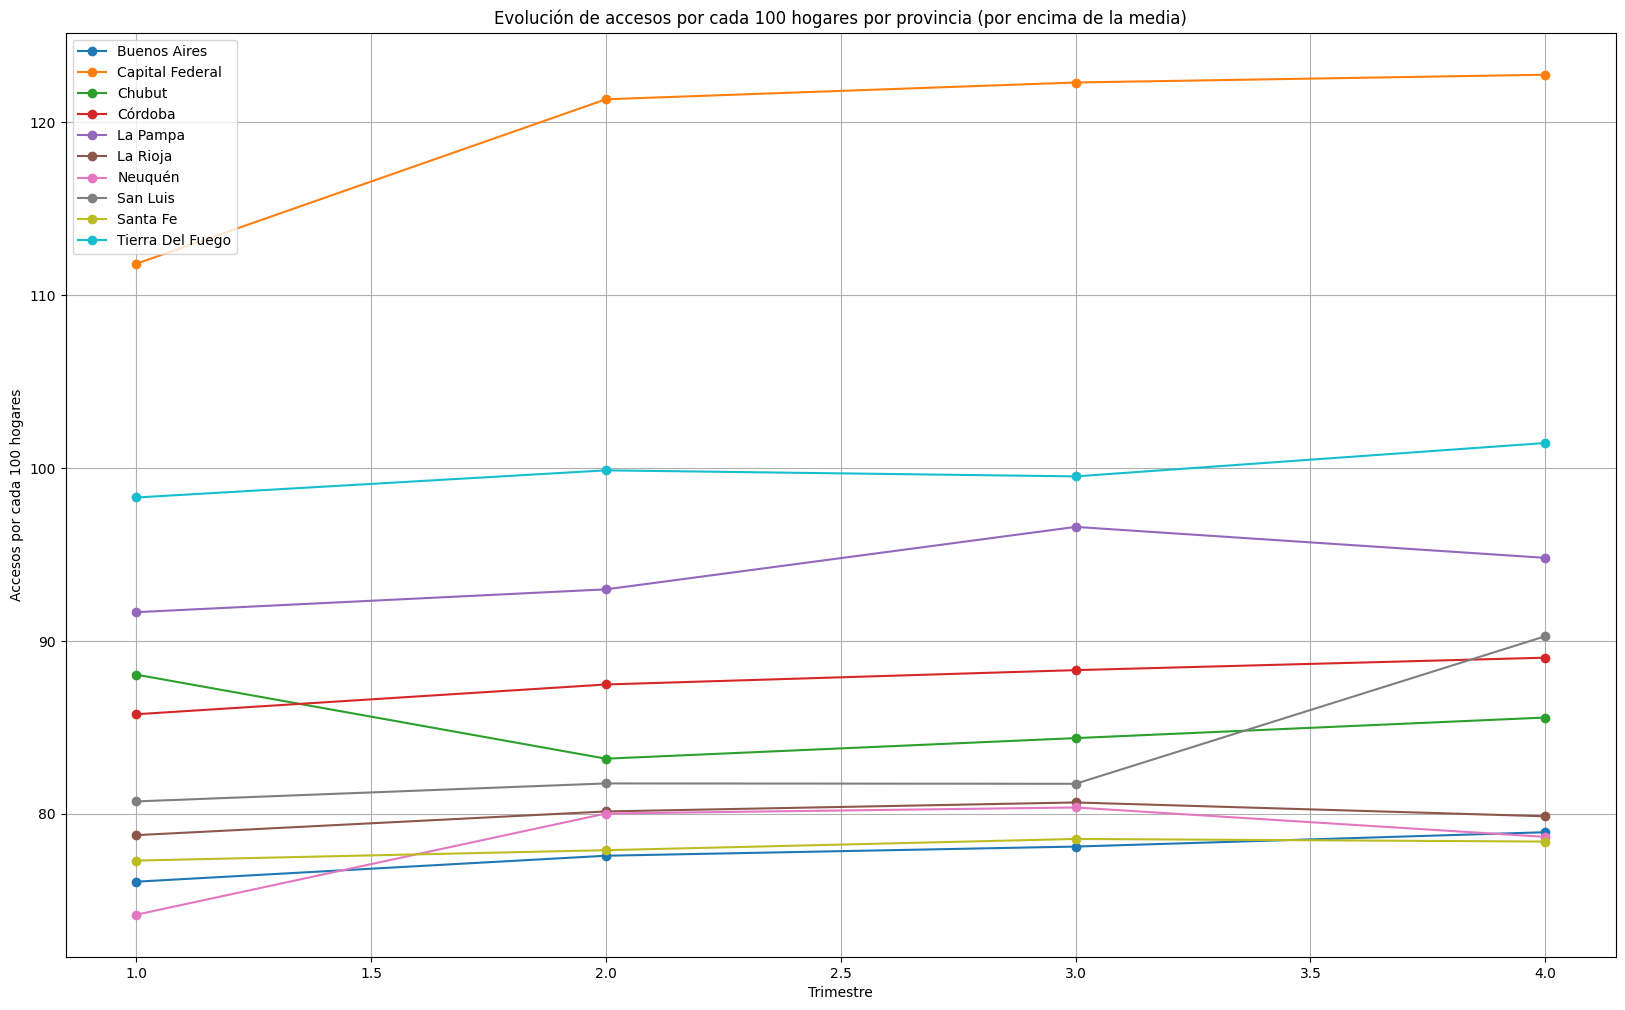

In [98]:

# Calcular la media de accesos_por_cada_100_hogares
media_accesos = Internet_Hogares['accesos_por_cada_100_hogares'].mean()

# Filtrar las provincias cuyo promedio de accesos_por_cada_100_hogares está por encima de la media
provincias_unicas = Internet_Hogares['provincia'].unique()
provincias_superior_media = []

for provincia in provincias_unicas:
    data_provincia = Internet_Hogares[Internet_Hogares['provincia'] == provincia]
    if data_provincia['accesos_por_cada_100_hogares'].mean() > media_accesos:
        provincias_superior_media.append(provincia)

# Crear un gráfico de línea con colores diferentes para las provincias por encima de la media
plt.figure(figsize=(20, 12))
for provincia in provincias_superior_media:
    data_provincia = Internet_Hogares[Internet_Hogares['provincia'] == provincia]
    plt.plot(data_provincia['trimestre'], data_provincia['accesos_por_cada_100_hogares'], marker='o', label=provincia)

plt.title('Evolución de accesos por cada 100 hogares por provincia (por encima de la media)')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend()  # Mostrar una leyenda con los nombres de las provincias
plt.grid(True)

# Mostrar el gráfico
plt.show()


La media de los datos en cada trimestre puede calcularse para la columna "Total", que representa la cantidad total de accesos a Internet. La media para cada trimestre en 2022:

- Primer Trimestre: 10,624,009
- Segundo Trimestre: 10,958,684
- Tercer Trimestre: 11,091,128
- Cuarto Trimestre: 11,208,114

La media se calcula sumando los valores de cada trimestre y dividiendo el resultado por el número de observaciones (en este caso, 4 trimestres).

La suma de estos números es:

10,624,009 + 10,958,684 + 11,091,128 + 11,208,114 = 44,881,935

Para obtener la media, simplemente debes dividir la suma por el número de valores, que en este caso es 4 trimestres:

44,881,935 / 4 = 11,220,483.75

La media de estos valores es aproximadamente 11,220,483.75.

In [99]:
Data_total2022

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,"31,981","85,668","1,075,272","1,109,421","765,015","335,573","7,410,902","394,282","11,208,114"
1,2022,3,"33,013","96,727","1,161,370","1,151,906","823,505","479,822","6,995,750","349,035","11,091,128"
2,2022,2,"33,667","99,498","1,193,090","1,197,030","856,562","485,321","6,741,922","351,594","10,958,684"
3,2022,1,"34,890","104,840","1,263,273","1,209,148","967,508","509,830","6,336,187","198,333","10,624,009"


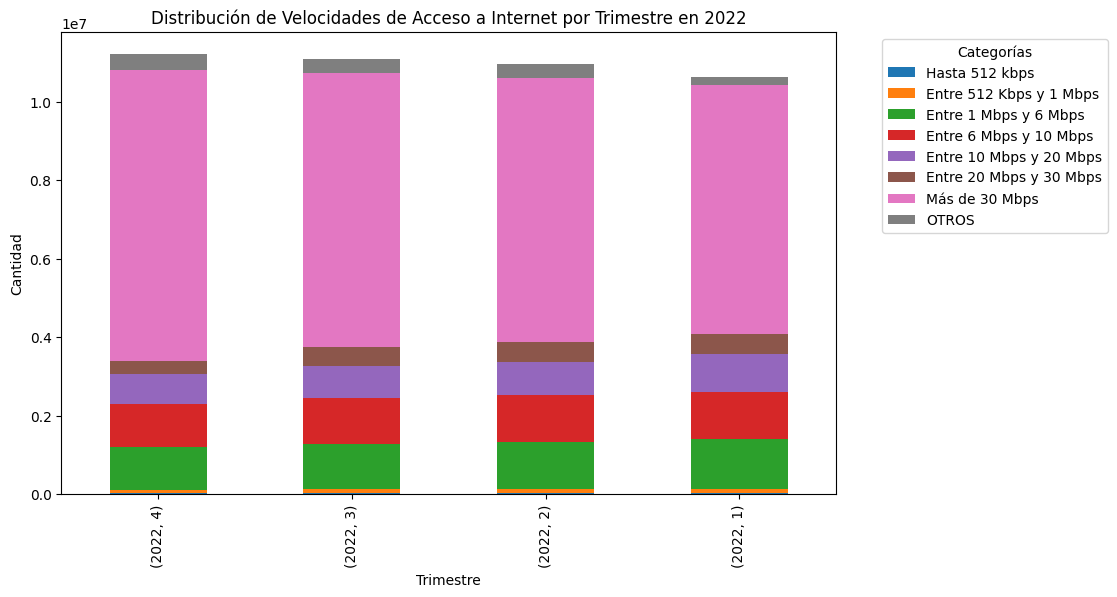

In [100]:
# Crear un DataFrame con los datos proporcionados
data = {
    'Año': [2022, 2022, 2022, 2022],
    'Trimestre': [4, 3, 2, 1],
    'Hasta 512 kbps': [31981, 33013, 33667, 34890],
    'Entre 512 Kbps y 1 Mbps': [85668, 96727, 99498, 104840],
    'Entre 1 Mbps y 6 Mbps': [1075272, 1161370, 1193090, 1263273],
    'Entre 6 Mbps y 10 Mbps': [1109421, 1151906, 1197030, 1209148],
    'Entre 10 Mbps y 20 Mbps': [765015, 823505, 856562, 967508],
    'Entre 20 Mbps y 30 Mbps': [335573, 479822, 485321, 509830],
    'Más de 30 Mbps': [7410902, 6995750, 6741922, 6336187],
    'OTROS': [394282, 349035, 351594, 198333],
    'Total': [11208114, 11091128, 10958684, 10624009]
}

df = pd.DataFrame(data)

# Configuración del gráfico de barras apiladas
df.set_index(['Año', 'Trimestre'])[[
    'Hasta 512 kbps',
    'Entre 512 Kbps y 1 Mbps',
    'Entre 1 Mbps y 6 Mbps',
    'Entre 6 Mbps y 10 Mbps',
    'Entre 10 Mbps y 20 Mbps',
    'Entre 20 Mbps y 30 Mbps',
    'Más de 30 Mbps',
    'OTROS']].plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalización del gráfico
plt.title('Distribución de Velocidades de Acceso a Internet por Trimestre en 2022')
plt.xlabel('Trimestre')
plt.ylabel('Cantidad')
plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


Lo que podemos apreciar en el gráfico es que Bs As, Santa Cruz, Santa Fe tienen una media de bajada alta. También podemos apreciar algunos outlieres. 

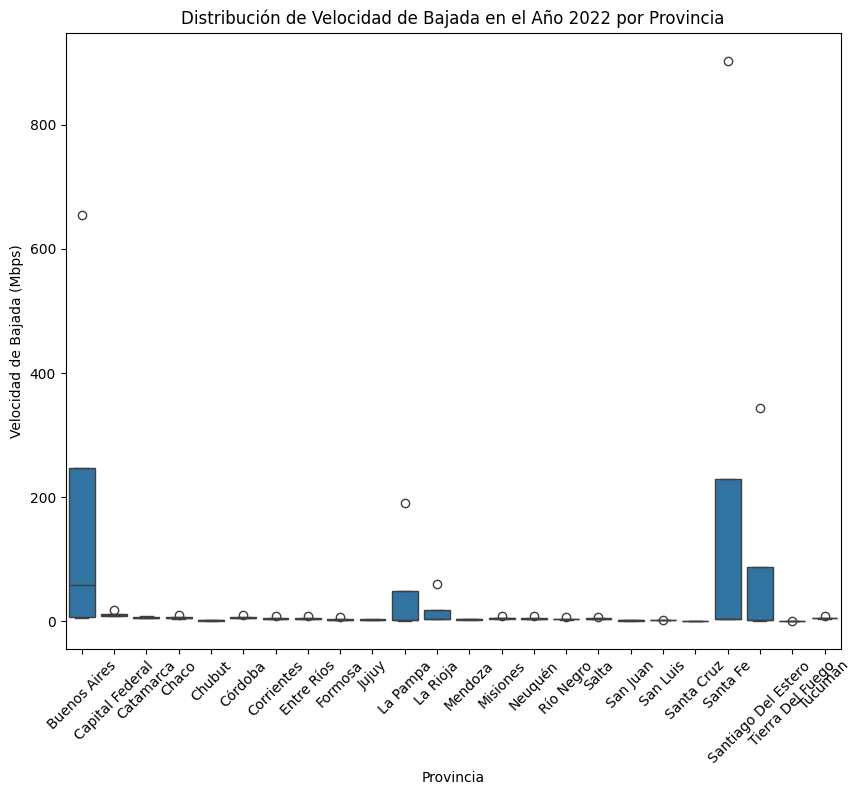

In [101]:

# Crear un boxplot
plt.figure(figsize=(10, 8))
data = vel_fijo_prov[vel_fijo_prov['Año'] == 2022]
sns.boxplot(data=data, x='Provincia', y='Mbps (Media de bajada)')
plt.xlabel('Provincia')
plt.ylabel('Velocidad de Bajada (Mbps)')
plt.title('Distribución de Velocidad de Bajada en el Año 2022 por Provincia')

# Rotar los nombres de las provincias para una mejor visualización
plt.xticks(rotation=45)

plt.show()



El gráfico de violín es la manera ideal de apreciar la distribución cuando los outliers superan mucho la gráfica del boxplot. 

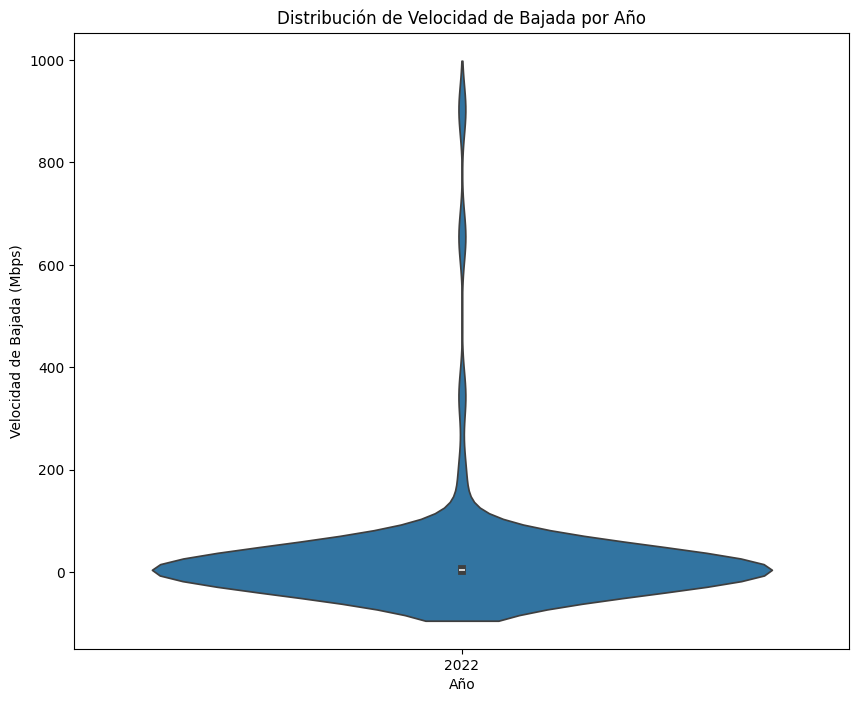

In [102]:

# Crear un gráfico de violín
plt.figure(figsize=(10, 8))
sns.violinplot(x='Año', y='Mbps (Media de bajada)', data=vel_fijo_prov)
plt.xlabel('Año')
plt.ylabel('Velocidad de Bajada (Mbps)')
plt.title('Distribución de Velocidad de Bajada por Año')
plt.show()


Como el trabajo está enfocado a las tecnologías y la migración de las mismas a un nuevo nivel, lo ideal es focalizarce en la Fibra Óptica y la Satelital. También se puede apreciar que hay algunas provincias que tienen una excepcional distribución de Fibra Óptica. Por ejemplo por la comparativa de "Calor" vemos a Buenos Aires, Córdoba, Santa Fe, Mendoza, Tucuman y CABA que sobresalen sobre el resto. Por otro lado el mapa de "Calor" de tecnología Satelital por los costos no está tan desarrollado por provincia. 

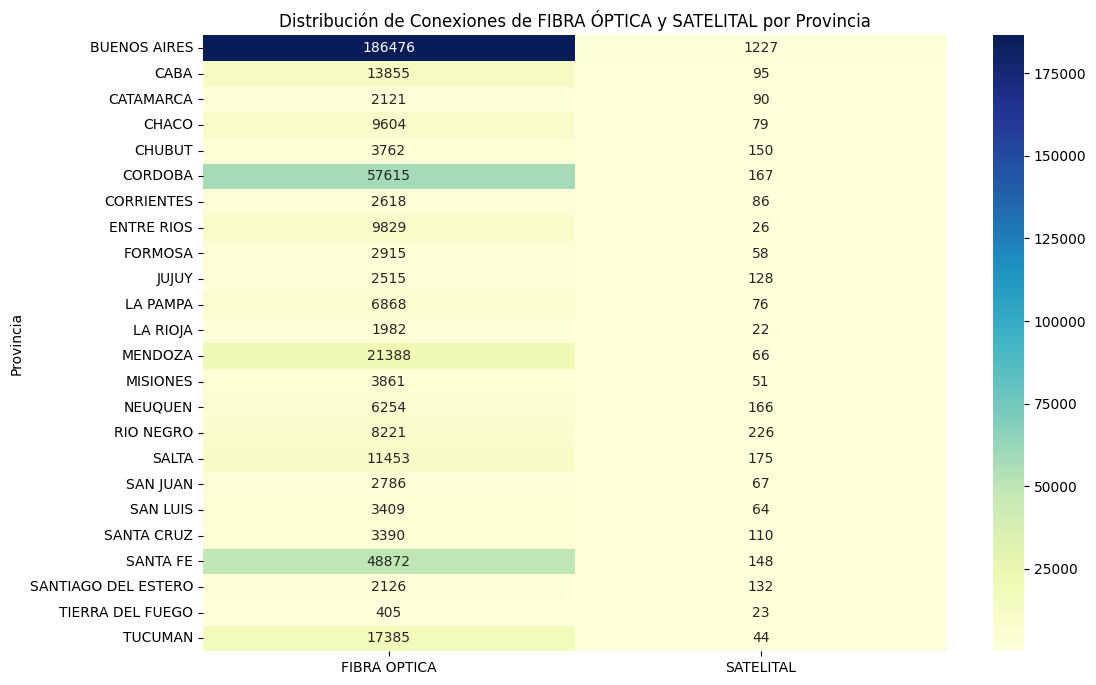

In [103]:
# Función para limpiar y convertir valores en números flotantes
def clean_and_convert(value):
    try:
        # Reemplaza comas por puntos y convierte a float
        cleaned_value = float(value.replace(',', '').replace('.', ''))
        return cleaned_value
    except (ValueError, AttributeError):
        return 0.0  # Si no se puede convertir, se establece en 0.0

# Aplicar la función a las columnas
acc_fijo_tec_loc['FIBRA OPTICA'] = acc_fijo_tec_loc['FIBRA OPTICA'].apply(clean_and_convert)
acc_fijo_tec_loc['SATELITAL'] = acc_fijo_tec_loc['SATELITAL'].apply(clean_and_convert)


# Agrupar los datos por provincia y suma las conexiones de FIBRA ÓPTICA y SATELITAL
datos_por_provincia = acc_fijo_tec_loc.groupby('Provincia')[['FIBRA OPTICA', 'SATELITAL']].sum()

# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(datos_por_provincia, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Distribución de Conexiones de FIBRA ÓPTICA y SATELITAL por Provincia')
plt.show()


In [104]:
tipos_de_datos = acc_fijo_vel_prov.dtypes
print(tipos_de_datos)


Año                      int64
Provincia               object
+ 20 Mbps - 30 Mbps    float64
+ 30 Mbps               object
OTROS                  float64
dtype: object


Para el estudio la franja de 20-30 Mbps es la que nos interesa porque es la que tiene mayor predisposición para migrar de tecnología (Formosa, Jujuy, Santiago del Estero). Detrás por supuesto de las provincias que ya lo hicieron como Bs As, Santa Fe, Córdoba, Mendoza, CABA.  

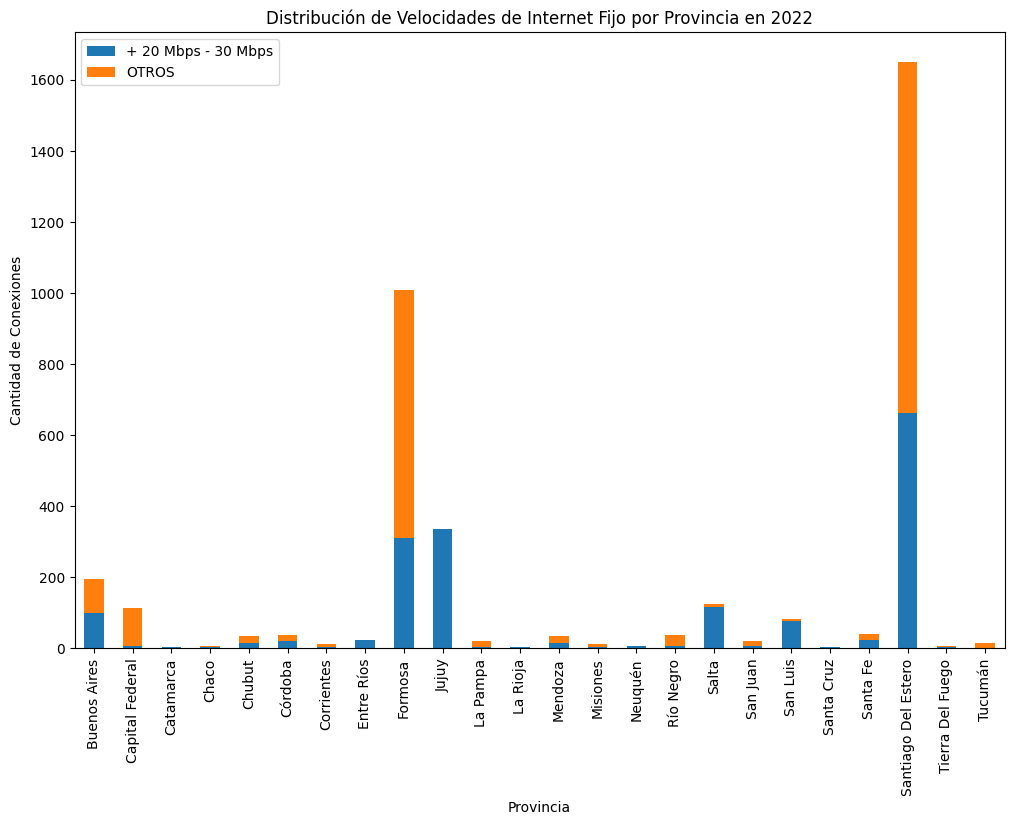

In [105]:
# Filtrar las columnas de interés
data_filtered = acc_fijo_vel_prov[['Provincia', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']]

# Establecer la provincia como índice y crear un gráfico de barras apiladas
data_filtered.set_index('Provincia').plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribución de Velocidades de Internet Fijo por Provincia en 2022')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Conexiones')
plt.show()



In [106]:
acc_fijo_vel_baj_loc

,Provincia,Localidad,Link Indec,20 Mbps,30 Mbps,50 Mbps,80 Mbps
0,BUENOS AIRES,25 de Mayo,6854100,595.000,96.0,NaN,12.0
1,BUENOS AIRES,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN
2,BUENOS AIRES,Del Valle,6854020,NaN,NaN,NaN,NaN
3,BUENOS AIRES,Ernestina,6854030,NaN,NaN,NaN,NaN
4,BUENOS AIRES,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3090,TUCUMAN,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,151.00,NaN
3091,TUCUMAN,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN
3092,TUCUMAN,Villa de Trancas,90112030,NaN,NaN,NaN,NaN
3093,TUCUMAN,Villa Carmela,90119020,31.000,NaN,NaN,NaN


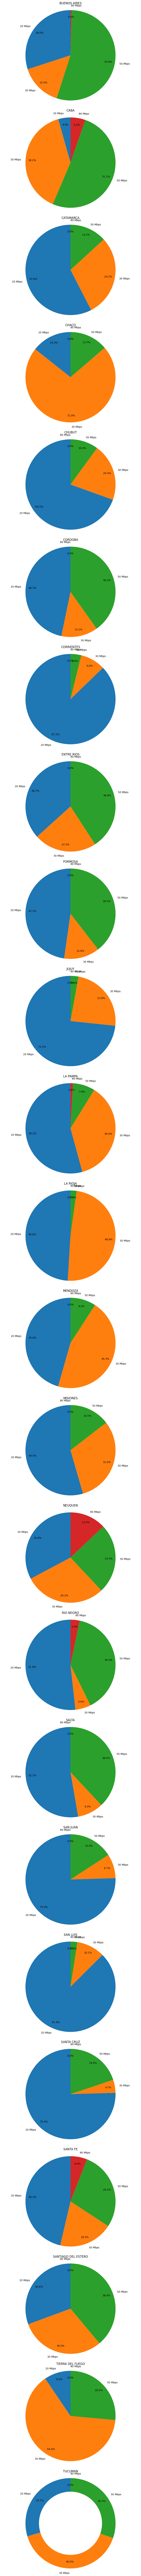

In [107]:

# Lista de provincias únicas en el dataframe
provincias = acc_fijo_vel_baj_loc['Provincia'].unique()

# Crear una figura con subplots para cada provincia
fig, axs = plt.subplots(len(provincias), figsize=(8, 6*len(provincias)))

# Iterar sobre cada provincia 
for i, provincia in enumerate(provincias):
    # Filtrar el dataframe 
    df_provincia = acc_fijo_vel_baj_loc[acc_fijo_vel_baj_loc['Provincia'] == provincia]
    
    # Sumar los valores para cada velocidad de Internet
    sum_20mbps = df_provincia['20 Mbps'].sum()
    sum_30mbps = df_provincia['30 Mbps'].sum()
    sum_50mbps = df_provincia['50 Mbps'].sum()
    sum_80mbps = df_provincia['80 Mbps'].sum()
    
    # Crear una lista con los valores sumados
    values = [sum_20mbps, sum_30mbps, sum_50mbps, sum_80mbps]
    
    # Crear una lista con las etiquetas correspondientes
    labels = ['20 Mbps', '30 Mbps', '50 Mbps', '80 Mbps']
    
    # Crear el gráfico de anillo para la provincia actual
    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    axs[i].set_title(provincia)
    
    # Círculo blanco en el centro para crear el efecto de anillo
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Igualar la relación de aspecto para asegurar que el gráfico se dibuje como un círculo
    axs[i].axis('equal')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [108]:
tipos_de_datos1 = lis_loc_con_int.dtypes
print(tipos_de_datos1)

Provincia         object
Localidad         object
ADSL              object
Cablemódem        object
Dial Up           object
Fibra óptica      object
4G                object
3G                object
Telefonía Fija    object
Wireless          object
Satelital         object
dtype: object


C:\Users\juana\AppData\Local\Temp\ipykernel_7392\744675080.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



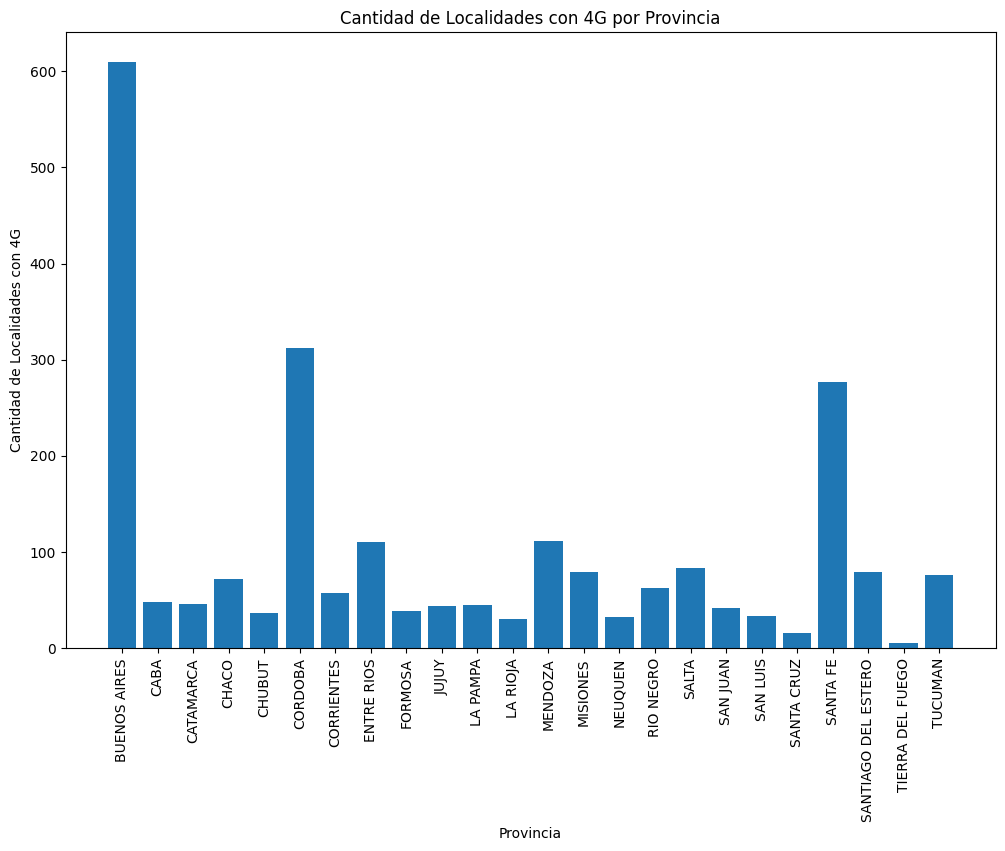

In [109]:
# Filtrar las columnas relevantes
data_filtered = lis_loc_con_int[['Provincia', '4G']]

# Reemplazar 'SI' con 1 y 'NO' con 0 en la columna '4G'
data_filtered['4G'] = data_filtered['4G'].map({'SI': 1, 'NO': 0})

# Agrupar por provincia y sumar la cantidad de localidades con 4G
total_4g_por_provincia = data_filtered.groupby('Provincia')['4G'].sum().reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(total_4g_por_provincia['Provincia'], total_4g_por_provincia['4G'])
plt.title('Cantidad de Localidades con 4G por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Localidades con 4G')
plt.xticks(rotation=90)
plt.show()


EDA PARA SEGUNDO DATASETS SOBRE RECLAMOS

GRAFICOS 

In [110]:
por_fijo.head()

,Operador,Cantidad
0,Telecom Argentina S.A.,2.528
1,Telefonica de Argentina S.A.,687.000
2,TELECENTRO S.A.,747.000
3,Otros,673.000


In [111]:
# Calcular los porcentajes y agregarlos como una nueva columna 'Porcentaje'
por_fijo['Porcentaje'] = (por_fijo['Cantidad'] / por_fijo['Cantidad'].sum()) * 100

# Redondear los valores de la columna 'Porcentaje' a dos decimales
por_fijo['Porcentaje'] = por_fijo['Porcentaje'].round(2)

# Mostrar el DataFrame actualizado
print(por_fijo)


                       Operador  Cantidad  Porcentaje
0        Telecom Argentina S.A.     2.528        0.12
1  Telefonica de Argentina S.A.   687.000       32.57
2               TELECENTRO S.A.   747.000       35.41
3                         Otros   673.000       31.90


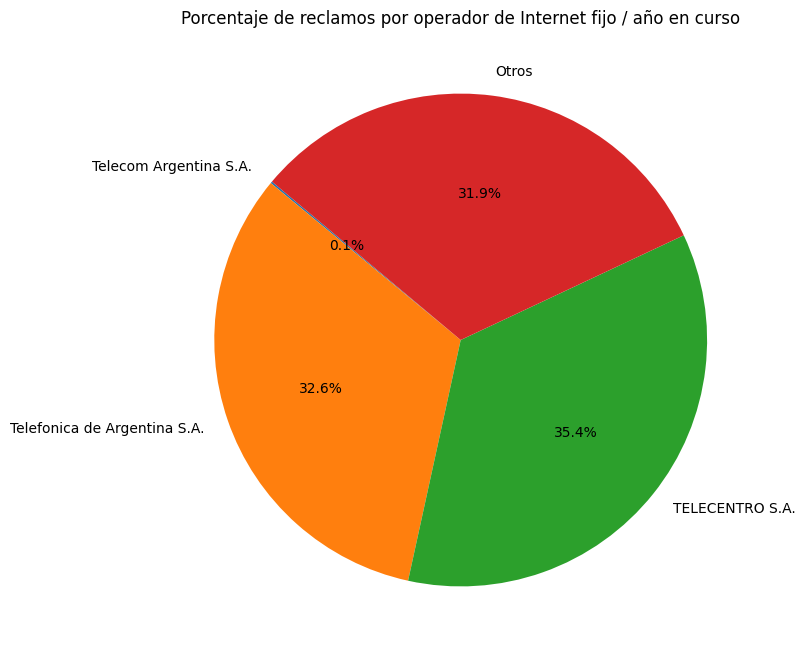

In [112]:
# Datos
operadores = por_fijo['Operador']
cantidad = por_fijo['Cantidad']

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(cantidad, labels=operadores, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de reclamos por operador de Internet fijo / año en curso')

# Mostrar el gráfico
plt.show()


In [113]:
por_movil.head()


,Operador,Cantidad
0,Telecom Argentina S.A.,1.018
1,Movistar - Telefonica Moviles Argentina S.A.,860.000
2,AMX Argentina S.A. (Claro),388.000
3,Otros,38.000


In [114]:
# Calcular los porcentajes y agregarlos como una nueva columna 'Porcentaje'
por_movil['Porcentaje'] = (por_movil['Cantidad'] / por_movil['Cantidad'].sum()) * 100

# Redondear los valores de la columna 'Porcentaje' a dos decimales
por_movil['Porcentaje'] = por_movil['Porcentaje'].round(2)

# Mostrar el DataFrame actualizado
print(por_movil)


                                       Operador  Cantidad  Porcentaje
0                        Telecom Argentina S.A.     1.018        0.08
1  Movistar - Telefonica Moviles Argentina S.A.   860.000       66.82
2                    AMX Argentina S.A. (Claro)   388.000       30.15
3                                         Otros    38.000        2.95


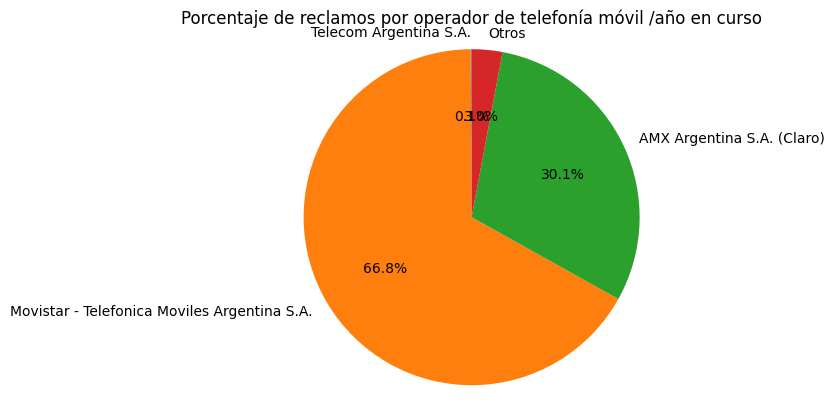

In [115]:
# Datos de ejemplo para operadores y cantidades 
operadores = por_movil.head()['Operador']
cantidades = por_movil.head()['Cantidad']

# Crear el gráfico de torta
fig, ax = plt.subplots()
ax.pie(cantidades, labels=operadores, autopct='%1.1f%%', startangle=90)

# Igualar la relación de aspecto para asegurar que el gráfico se dibuje como un círculo
ax.axis('equal')

# Agregar una etiqueta al gráfico
ax.set_title("Porcentaje de reclamos por operador de telefonía móvil /año en curso")

# Mostrar el gráfico
plt.show()



Reclamos mensuales por tipo de servicio

In [116]:
rec_ser

,Año,Mes,Telefonía Fija,Internet Fijo,Comunicaciones Moviles,TV por cable,Total mensual
0,2023,1,1.161,694,257,144,2.256
1,2023,2,1.032,658,257,145,2.092
2,2023,3,1.262,819,366,171,2.618
3,2023,4,849.000,469,257,107,1.682
4,2023,5,775.000,472,253,98,1.598
5,2023,6,712.000,477,223,64,1.476
6,2023,7,648.000,421,245,92,1.406
7,2023,8,647.000,395,263,88,1.393
8,2023,9,668.000,469,214,84,1.435


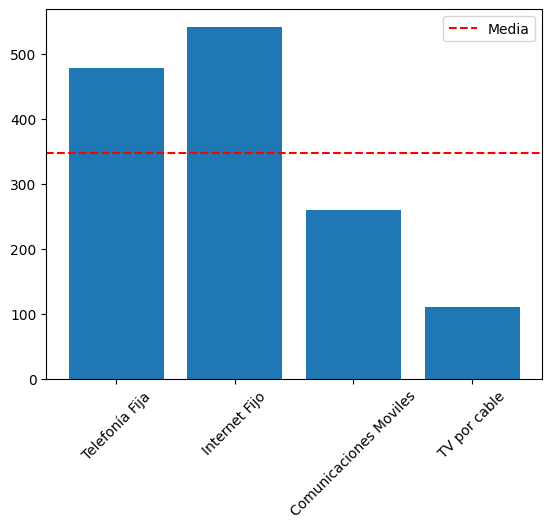

In [117]:

# Calcular la media de cada columna en el dataframe
media_telefonia_fija = rec_ser['Telefonía Fija'].mean()
media_internet_fijo = rec_ser['Internet Fijo'].mean()
media_comunicaciones_moviles = rec_ser['Comunicaciones Moviles'].mean()
media_tv_por_cable = rec_ser['TV por cable'].mean()

# Crear una lista con los valores de la media
values = [media_telefonia_fija, media_internet_fijo, media_comunicaciones_moviles, media_tv_por_cable]

# Crear una lista con las etiquetas correspondientes
labels = ['Telefonía Fija', 'Internet Fijo', 'Comunicaciones Moviles', 'TV por cable']

# Crear una lista con los índices para las barras
x = np.arange(len(labels))

# Crear el gráfico de barras
fig, ax = plt.subplots()
ax.bar(x, values)

# Agregar las etiquetas en el eje x con rotación a 45 grados
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)

# Agregar una línea horizontal en la media
ax.axhline(np.mean(values), color='red', linestyle='--', label='Media')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


Reclamos mensuales recibidos por motivo de reclamo

In [118]:
rec_mot

,Año,Mes,Problemas técnicos,Facturación,Gestiones administrativas,Otros,Total mensual
0,2023,1,1240,504,407,105,2256
1,2023,2,1140,468,393,91,2092
2,2023,3,1384,633,433,168,2618
3,2023,4,842,440,294,106,1682
4,2023,5,777,434,293,94,1598
5,2023,6,665,399,320,92,1476
6,2023,7,648,379,291,88,1406
7,2023,8,656,368,288,81,1393
8,2023,9,743,341,260,91,1435


In [119]:

# Crear un DataFrame con tus datos
data = {
    'Año': [2023] * 9,
    'Mes': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Problemas técnicos': [1240, 1140, 1384, 842, 777, 665, 648, 656, 743],
    'Facturación': [504, 468, 633, 440, 434, 399, 379, 368, 341],
    'Gestiones administrativas': [407, 393, 433, 294, 293, 320, 291, 288, 260],
    'Otros': [105, 91, 168, 106, 94, 92, 88, 81, 91],
    'Total mensual': [2256, 2092, 2618, 1682, 1598, 1476, 1406, 1393, 1435]
}

df = pd.DataFrame(data)

# Mapear números de mes a nombres de mes
meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre'
}

# Reemplazar los números de mes por nombres de mes
df['Mes'] = df['Mes'].map(meses)

# Crear el treemap
fig = px.treemap(
    data_frame=df,  # Especifica el DataFrame aquí
    path=['Año', 'Mes'],  # Define la jerarquía de categorías
    values='Total mensual'  # Especifica la columna para los valores
)

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


In [120]:
rec_rec.columns


Index(['Año', 'Mes', 'Motivo de Reclamo', 'Operador', 'Cantidad'], dtype='object')

In [121]:

# Obtener los tipos de dato de cada columna
tipos_de_dato = rec_rec.dtypes

# Mostrar los tipos de dato de cada columna
print(tipos_de_dato)


Año                   int64
Mes                   int64
Motivo de Reclamo    object
Operador             object
Cantidad              int64
dtype: object


In [122]:
# Seleccionar solo las columnas 'Motivo de Reclamo' y 'Operador'
rec_rec = rec_rec[['Motivo de Reclamo', 'Operador']]

# Mostrar las primeras filas del DataFrame resultante
rec_rec


,Motivo de Reclamo,Operador
0,Facturación,AMX Argentina S.A. (Claro)
1,Facturación,DIRECTV Argentina S.A.L
2,Facturación,Fibertel S.A. (TCI)
3,Facturación,Movistar - Telefonica Moviles Argentina S.A.
4,Facturación,Otros
...,...,...
311,Problemas Técnicos,Movistar - Telefonica Moviles Argentina S.A.
312,Problemas Técnicos,Otros
313,Problemas Técnicos,TELECENTRO S.A.
314,Problemas Técnicos,Telecom Argentina S.A.


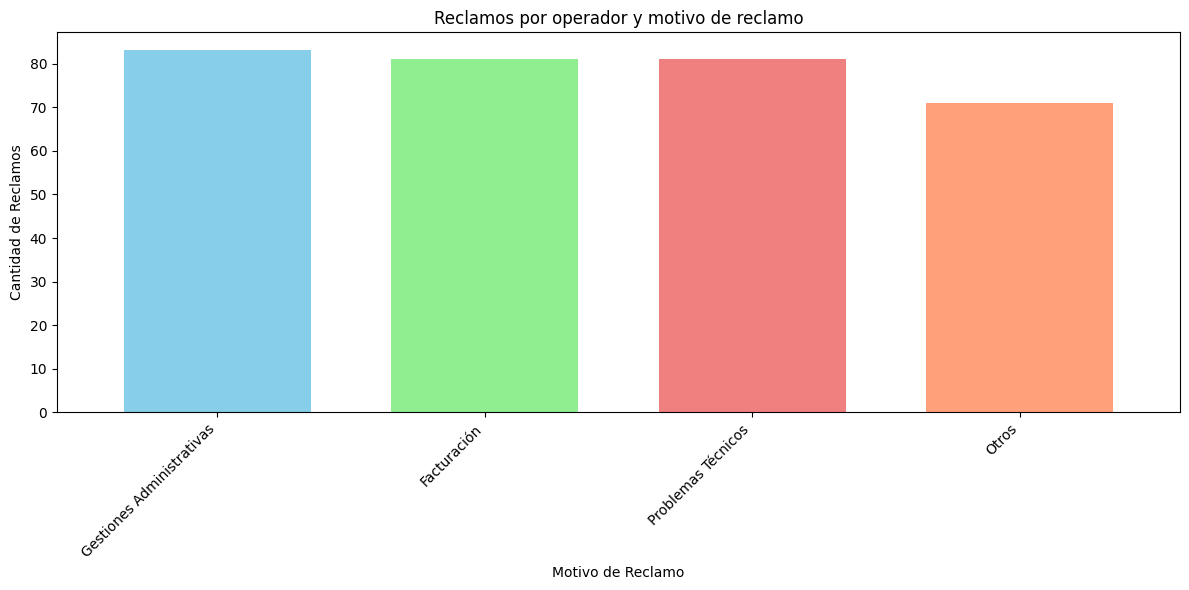

In [123]:

# Contar la cantidad de registros por motivo de reclamo
count_motivo = rec_rec['Motivo de Reclamo'].value_counts()

# Colores personalizados
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightblue']

# Crear el gráfico de barras con colores personalizados y barras más delgadas y altas
plt.figure(figsize=(12, 6))  # Aumentar el ancho de la figura
count_motivo.plot(kind='bar', color=colors, width=0.7)  # Ancho de 0.7 para barras más delgadas
plt.title('Reclamos por operador y motivo de reclamo')
plt.xlabel('Motivo de Reclamo')
plt.ylabel('Cantidad de Reclamos')

plt.xticks(rotation=45, ha='right')  # Aumentar el espacio entre etiquetas y rotarlas
plt.tight_layout()
plt.show()



vel_fijo_prov : Velocidad media de bajada de internet fijo por provincia

acc_fijo_tec_loc : Acceso a Internet fijo por tecnología y localidad 

acc_fijo_vel_prov : Acceso a Internet Fijo por rangos de velcoidad de bajada y provincia

acc_fijo_vel_baj_loc : Accesos a Internet fijo por velcoidad de bajada y localidad 

lis_loc_con_int : Listado de localidades con conectividad a internet



por_fijo : Porcentaje de reclamos por operador de Internet fijo (año en curso)

por_movil : Porcentaje de reclamos por operador de telefonía móvil (año en curso)

rec_ser : Reclamos mensuales por tipo de servicio

rec_mot : Reclamos mensuales recibidos por motivo de reclamo

rec_rec : Reclamos por operador y motivo de reclamo 


BAJO PRINCIPAL DATASET 

In [124]:
Internet_Hogares.to_csv('Internet_Hogares100.csv', index=False)

In [125]:
# El argumento index=False evita que se incluya el índice en el archivo CSV. Guardar en .csv DataFrame EDA 
Data_total2022.to_csv('Data_total2022.csv', index=False)  


In [126]:
# El argumento index=False evita que se incluya el índice en el archivo CSV. Guardar en .csv DataFrame EDA 
vel_fijo_prov.to_csv('Media_bajada_fijo_provincia.csv', index=False)  


In [127]:
# El argumento index=False evita que se incluya el índice en el archivo CSV. Guardar en .csv DataFrame EDA 
acc_fijo_tec_loc.to_csv('Acceso_fijo_tecnología_localidad.csv', index=False)  

In [128]:
# El argumento index=False evita que se incluya el índice en el archivo CSV. Guardar en .csv DataFrame EDA 
acc_fijo_vel_prov.to_csv('Acceso_Fijo_rangos_velocidad_bajada_provincia.csv', index=False)  

In [129]:
# El argumento index=False evita que se incluya el índice en el archivo CSV. Guardar en .csv DataFrame EDA 
acc_fijo_vel_baj_loc.to_csv('Accesos_fijo_velcoidad_bajada_localidad.csv', index=False)  

In [130]:
# El argumento index=False evita que se incluya el índice en el archivo CSV. Guardar en .csv DataFrame EDA 
lis_loc_con_int.to_csv('Listado_localidades_conectividad_internet.csv', index=False)  

BAJO SEGUNDO DATASET

In [131]:
# El argumento index=False evita que se incluya el índice en el archivo CSV. Guardar en .csv DataFrame EDA 
por_fijo.to_csv('Reclamos_Internet_fijo.csv', index=False)  

In [132]:
# El argumento index=False evita que se incluya el índice en el archivo CSV. Guardar en .csv DataFrame EDA 
por_movil.to_csv('Reclamos_telefonía_móvil.csv', index=False)  

In [133]:
# El argumento index=False evita que se incluya el índice en el archivo CSV. Guardar en .csv DataFrame EDA 
rec_ser.to_csv('Reclamos_mensuales_tipo_servicio.csv', index=False)  

In [134]:
# El argumento index=False evita que se incluya el índice en el archivo CSV. Guardar en .csv DataFrame EDA 
rec_ser.to_csv('Reclamos_motivo_reclamo.csv', index=False)  

In [135]:
# El argumento index=False evita que se incluya el índice en el archivo CSV. Guardar en .csv DataFrame EDA 
rec_rec.to_csv('Reclamos_reclamo.csv', index=False)  

Brasil con funcionamiento de 5G desde el 2022 en tres ciudades con sus Departamentos. Tercer DataSet. 

In [136]:
data = {
    'Río de Janeiro': ['Bangu', 'Botafogo', 'Barra da Tijuca', 'Campo Grande', 'Copacabana', 'Flamengo', 'Guaratiba', 'Inhaúma', 'Ipanema', 'Jacarepaguá', 'Lagoa', 'Laranjeira', 'Leblon', 'Meier', 'Pavuna', 'Recreio', 'São Conrado', 'Tijuca'],
    'País': ['Brasil','Brasil', 'Brasil', 'Brasil', 'Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil']
}

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame.from_dict(data, orient='index').T

# Guardar el DataFrame en un archivo CSV
df.to_csv('5G_Brasil_RJ.csv', index=False)

df

,Río de Janeiro,País
0,Bangu,Brasil
1,Botafogo,Brasil
2,Barra da Tijuca,Brasil
3,Campo Grande,Brasil
4,Copacabana,Brasil
5,Flamengo,Brasil
6,Guaratiba,Brasil
7,Inhaúma,Brasil
8,Ipanema,Brasil
9,Jacarepaguá,Brasil


In [137]:
data1 = {
    'Florianópolis': ['Abraão', 'Agronomic', 'Cachoeira Do Bom Jesus', 'Cachoeira Do Bom Jesus Leste', 'Canasvieiras', 'Canto Do Lamim', 'Capivari', 'Capoeiros', 'Centro', 'Coloninha', 'Coqueiros', 'Estreito', 'Ingleses Sul', 'Jardim Atlântico', 'Jurerê East', 'Jurerê Oeste', 'Monte Cristo', 'Ponta das Canas', 'Santinho'],
    'País': ['Brasil', 'Brasil', 'Brasil', 'Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil']
}

# Crear un DataFrame a partir del diccionario
df1 = pd.DataFrame.from_dict(data1, orient='index').T

# Guardar el DataFrame en un archivo CSV
df1.to_csv('5G_Brasil_F.csv', index=False)

df1

,Florianópolis,País
0,Abraão,Brasil
1,Agronomic,Brasil
2,Cachoeira Do Bom Jesus,Brasil
3,Cachoeira Do Bom Jesus Leste,Brasil
4,Canasvieiras,Brasil
5,Canto Do Lamim,Brasil
6,Capivari,Brasil
7,Capoeiros,Brasil
8,Centro,Brasil
9,Coloninha,Brasil


In [138]:
data2 = {
    'Vitória': ['Enseada do Suá', 'Goiabeiras', 'Jardim Camburi', 'Jardim da Penha', 'Mata da Praia', 'Praia do Canto', 'Santa Helena', 'Santa Lucia'],
    'País': ['Brasil','Brasil', 'Brasil', 'Brasil', 'Brasil','Brasil','Brasil']
}

# Crear un DataFrame a partir del diccionario
df2 = pd.DataFrame.from_dict(data2, orient='index').T

# Guardar el DataFrame en un archivo CSV
df2.to_csv('5G_Brasil_V.csv', index=False)

df2

,Vitória,País
0,Enseada do Suá,Brasil
1,Goiabeiras,Brasil
2,Jardim Camburi,Brasil
3,Jardim da Penha,Brasil
4,Mata da Praia,Brasil
5,Praia do Canto,Brasil
6,Santa Helena,Brasil
7,Santa Lucia,None
